<a href="https://colab.research.google.com/github/JSJeong-me/KOSA_Vision_Exercise/blob/main/counts/segment_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io as sk

#from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

In [2]:
def show(img):
    plt.imshow(img)
    plt.show()

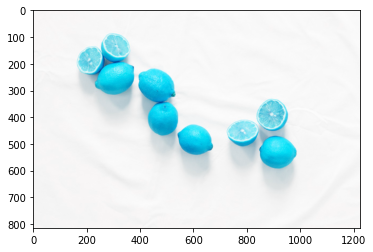

(814, 1225, 3)


In [4]:
#load
fp = "lemon.jpg"
img = cv2.imread(fp)
show(img)
print(img.shape)

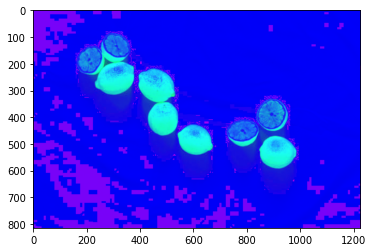

In [5]:
#converting to HSV color model
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv)

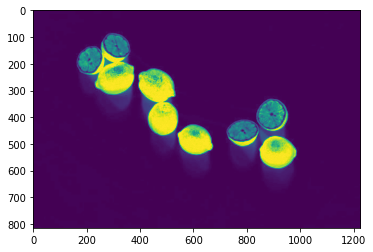

In [6]:
h, s, v = cv2.split(hsv)
show(s)
# reference : https://stackoverflow.com/questions/34712144/merge-hsv-channels-under-opencv-3-in-python

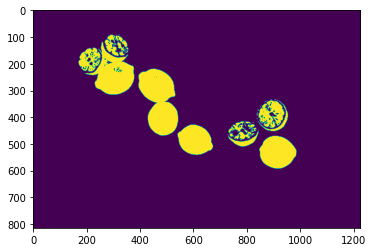

In [7]:
_, thr = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(thr)
# reference : https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-3-otsu-thresholding/

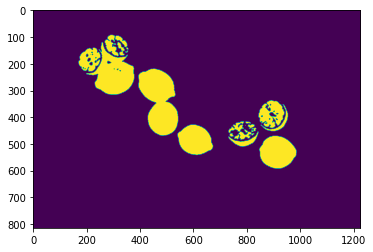

In [8]:
#blurring the image
blur = cv2.medianBlur(thr, 5)
show(blur)

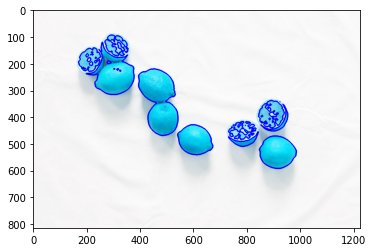

number of lemons found including error =  40


In [9]:
copy1 = img.copy()
contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(copy1, contours, -1, (0,0,255), 3)
show(copy1)
print("number of lemons found including error = ", len(contours))
#references: 
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html
#https://github.com/facebookresearch/maskrcnn-benchmark/issues/339 """

**This is not accurate result since small patches of image segments are also being detected. Lets remove them to get better result. Then repeat the above step again.**

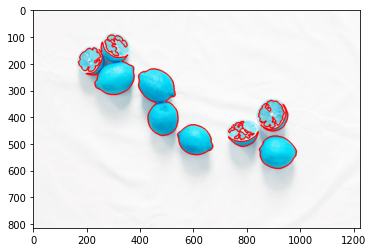

number of lemons found via contour detection =  10


In [10]:
# arbitarily removing patches having area greater than 1000
copy2 = img.copy()
count = []
for x in contours:
    area = cv2.contourArea(x)
    if area > 1000 :
        count.append(x)
cv2.drawContours(copy2, count, -1, (255,0,0), 3)
show(copy2)
print("number of lemons found via contour detection = ", len(count))

Watershed : 

In [11]:
copy3 = img.copy()
D = ndimage.distance_transform_edt(thr)
localMax = peak_local_max(D, indices=False, min_distance=40,
	labels=thr)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thr)
ws = len(np.unique(labels)) -1
copy3[labels == -1] = [255,0,0]
print("no. of lemons found via watershed algorithm = ", ws)

no. of lemons found via watershed algorithm =  9


**Finally we print the average result of contour detection and watershed**

number of lemon segments detected =  9


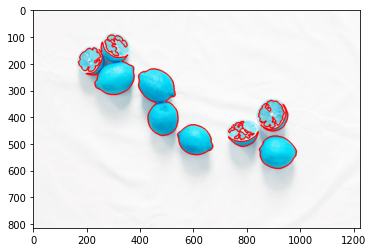

In [12]:
ans = int((len(count) + len(np.unique(labels)) -1) / 2)
print("number of lemon segments detected = ", ans)
show(copy2)